Here you can have the dataset:

https://drive.google.com/file/d/1Rg2pXKCWuAx0a2HnIg1NAa2HaN5HTSzs/view?usp=drive_link

Let's do some preprocessing with data.

First Cell : Data preprocessing
This step includes removing irrelevant data columns, neutralizing Null values and etc.

Second Cell : Data preprocessing - Continued

In this phase, I try to categorize several column values for potentially doing a regression. Then I move on toward removing Chinese characters and removing outlier prices.

Third Cell : Adding Features such as Distance to Capital

I was wondering whether there is a relationship between Distance To Capital and housing prices or not. According to my examination, yes there is a strong negative relationship betwen these two variables. I also examined relationship between effect of having elevator on housing prices.

Fourth Cell : Time Series Analysis

/var/folders/8z/98qqp5hx6015b0xv1nv32b4h0000gn/T/ipykernel_3019/1764973922.py:2: DtypeWarning: Columns (2,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('housing_data.csv', encoding='gbk')


,Column,number of null values
0,Lng,0
1,Lat,0
2,tradeTime,0
3,DOM,157977
4,totalPrice,0
5,square,0
6,livingRoom,0
7,drawingRoom,0
8,kitchen,0
9,bathRoom,0


          Lng        Lat   tradeTime     DOM  totalPrice  square livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00          2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38          2   
2  116.561978  39.877145  2016-12-11  1271.0      1030.0  198.00          3   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00          3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00          2   

  drawingRoom  kitchen bathRoom floor constructionTime  renovationCondition  \
0           1        1        1  高 26             2005                    3   
1           2        1        2  高 22             2004                    4   
2           2        1        3   中 4             2005                    3   
3           1        1        1  底 21             2008                    1   
4           1        1        1   中 6             1960                    2   

   buildingStructure  ladderRatio  elevator  subwa

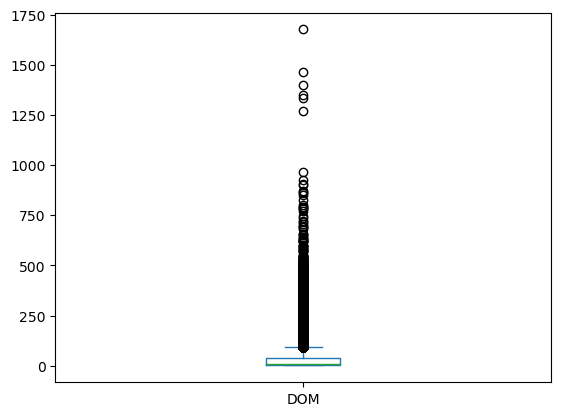

In [11]:
import pandas as pd
housing = pd.read_csv('housing_data.csv', encoding='gbk')
housing.shape
housing_dropped =housing.drop(columns=['Unnamed: 0','url','id','Cid'])
#index=list(range(0,len(housing_dropped.columns)))
#housing_null = pd.DataFrame(housing_dropped.isnull().sum(),index=index)
housing_null=housing_dropped.isnull().sum().reset_index()
housing_null.columns = ['Column','number of null values']
display(housing_null)
housing_dropped.DOM.plot(kind = 'box')
housing_no_missing = housing_dropped.copy()
print(housing_no_missing.head())
housing_no_missing['DOM'].fillna(int(housing_no_missing['DOM'].mode()),inplace=True)
print(housing_no_missing['elevator'].isna()==True)
condition=housing_no_missing['elevator'].isna()==True
print(housing_no_missing['elevator'].loc[condition])
housing_no_missing.drop(labels=housing_no_missing[condition].index,inplace=True,axis=0)
housing_no_missing.isnull().sum()
housing_no_missing.info()
housing_no_missing.to_csv('housing_no_missing.csv', encoding='gbk', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318819 entries, 0 to 318818
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  int64  
 7   drawingRoom          318819 non-null  int64  
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  int64  
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator         

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318814,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,中 5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3
318815,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,中 24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3
318816,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,中 7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3
318817,116.501794,39.799347,2016-06-12,1.0,720.0,178.34,4,2,1,2,中 5,2003,hardcover,mixed,0.500,no elevator,no subway,3


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


constructionTime :  [2005 2004 2008 1960 1997 2009 2006 1991 2001 1990 2011 2000 1998 2010
 1996 1993 2002 2012 1989 2003 2007 1994 1984 1992 2014 1985 2013 1999
 1979 1981 1976 1982 1975 1983 1986 1995 1965 1988 1987 2015 1955 1980
 1978 1958 1970 1956 1977 1964 1963 1967 2016 1974 1973 1959 1954 1962
 1966 1957 1944 1972 1971 1953 1968 1961 1950 1952 1933 1969 1906 1934
 1914]
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '中 17' '顶 6' '中 24' '中 15' '底 5'
 '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '低 6' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '中 13' '低 33' '底 14' '高 15' '底 4'
 '顶 11' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12' '低 31' '低 30'
 '低 19' '中 32' '低 12' '中 10' '中 16' '顶 20' '底 19' '中 31' '低 13' '底 10'
 '高 25' '中 21' '中 20' '高 20' '低 21' '低 24' '顶 4' '高 21' '高 7' '中 22' '底 1'
 '中 7' '底 8' '顶 15' '高 28'

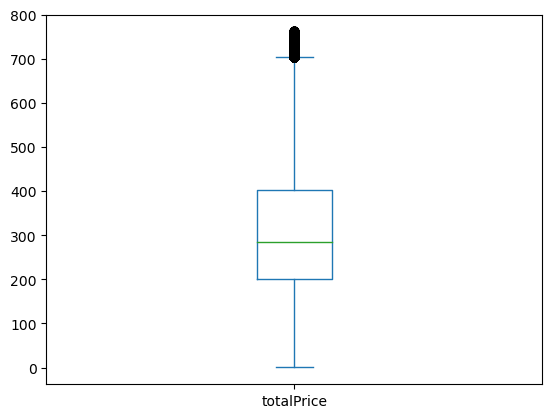

In [12]:
housing_no_missing = pd.read_csv('housing_no_missing.csv', encoding='gbk')
housing_categorical = housing_no_missing.copy()
housing_categorical.info()
def buildingStructure(x):
    if x ==1 :
        return 'unknown'
    elif x==2:
        return 'mixed'
    elif x==3:
        return 'brick and wood'
    elif x==4:
        return 'concrete'
    elif x==5:
        return 'steel'
    elif x==6:
        return 'steel-concrete composite'
    
def renovationCondition(x):
    if x==1:
        return 'other'
    elif x==2:
        return 'rough'
    elif x==3:
        return 'Simplicity'
    elif x==4:
        return 'hardcover'
#applymap - map - np.where - np.select
housing_categorical['elevator']=housing_categorical['elevator'].apply(lambda x : 'has elevator' if (x==1) else 'no elevator')
housing_categorical['subway']=housing_categorical['subway'].apply(lambda x : 'has subway' if (x==1) else 'no subway')
housing_categorical['buildingStructure']=housing_categorical['buildingStructure'].apply(buildingStructure)
housing_categorical['renovationCondition']=housing_categorical['renovationCondition'].apply(renovationCondition)
housing_categorical.head()
housing_categorical.info()
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())
housing_construction = housing_categorical.copy()
display(housing_construction)
housing_construction.drop(housing_construction[housing_construction['constructionTime']=='未知'].index,inplace=True)
housing_construction['constructionTime']=housing_construction['constructionTime'].astype(int)
housing_construction = housing_construction

display(housing_construction.head())
print('constructionTime : ',housing_construction.constructionTime.unique())
print('floor : ',housing_construction.floor.unique())
housing_floor = housing_construction.copy()
housing_floor['floor']=housing_floor['floor'].apply(lambda x:x.split()[1])
housing_floor['floor']=housing_floor['floor'].astype(int)
housing_floor = housing_floor

housing_floor.head()
housing_floor.info()
#housing_floor.totalPrice.plot(kind = 'box')
Q1 = housing_floor['totalPrice'].quantile(.25)
Q3 = housing_floor['totalPrice'].quantile(.75)
IQR = Q3 - Q1
housing_no_outlier = housing_floor[(housing_floor['totalPrice']<Q3+1.5*IQR)&(housing_floor['totalPrice']>Q1-1.5*IQR)]

print('Number of removed outliers : ', housing_floor.shape[0] - housing_no_outlier.shape[0])
housing_no_outlier.totalPrice.plot(kind = 'box')
housing_no_outlier.to_csv('housing_no_outlier.csv', encoding='gbk', index=False)

/var/folders/8z/98qqp5hx6015b0xv1nv32b4h0000gn/T/ipykernel_3019/2381587421.py:25: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_PPS.hist(ax = ax, bins = 20);


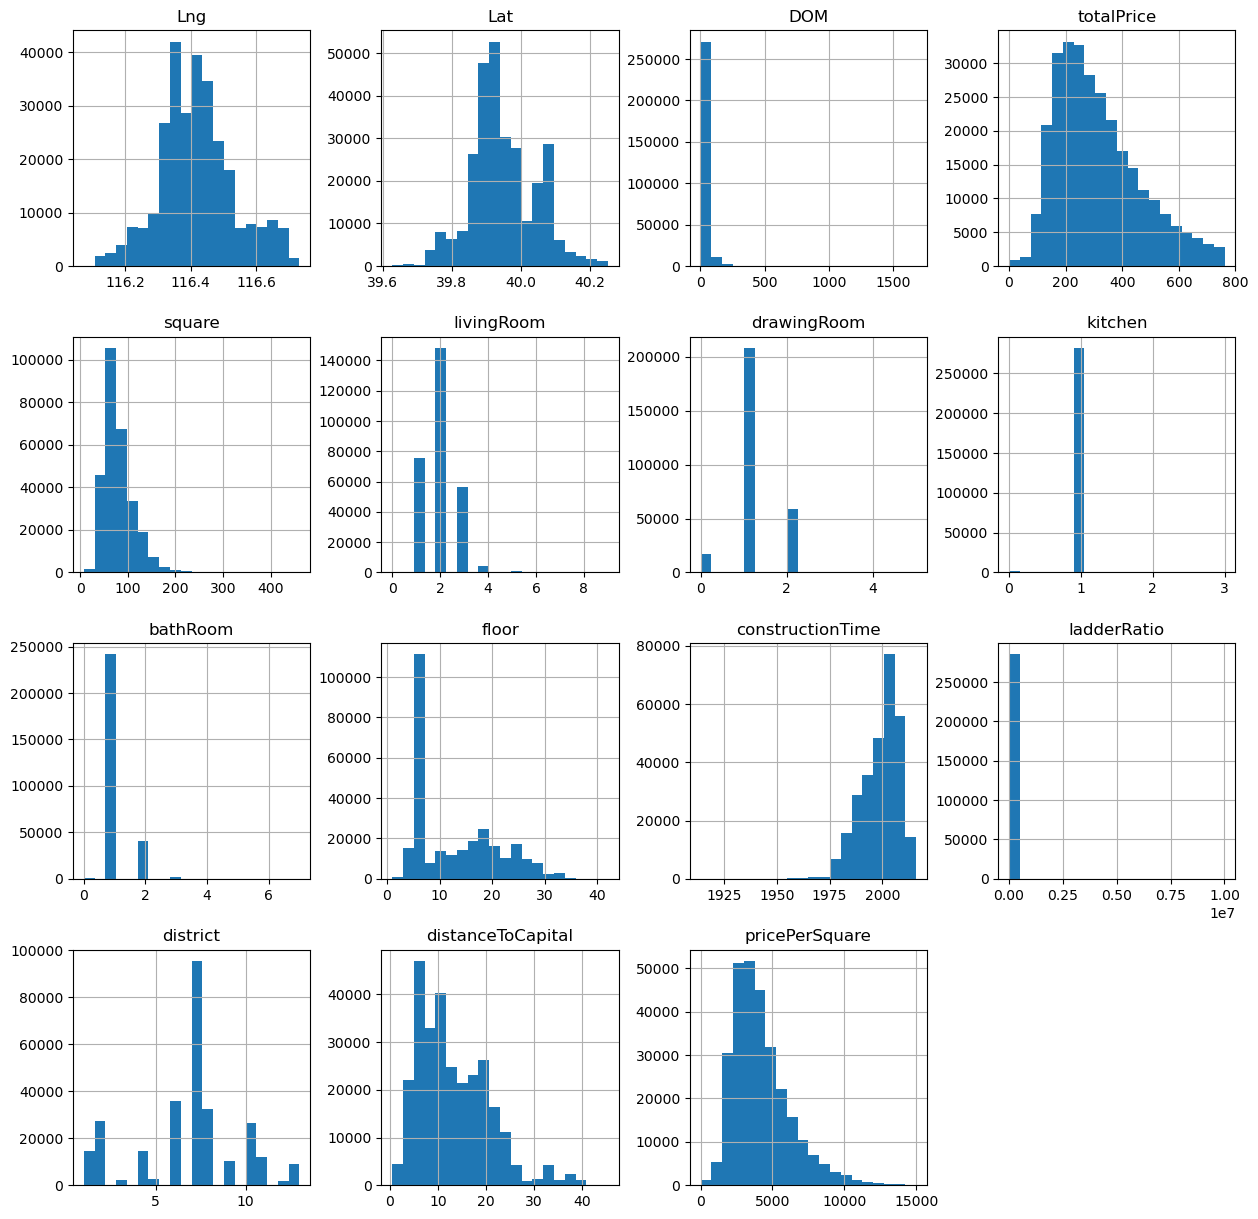

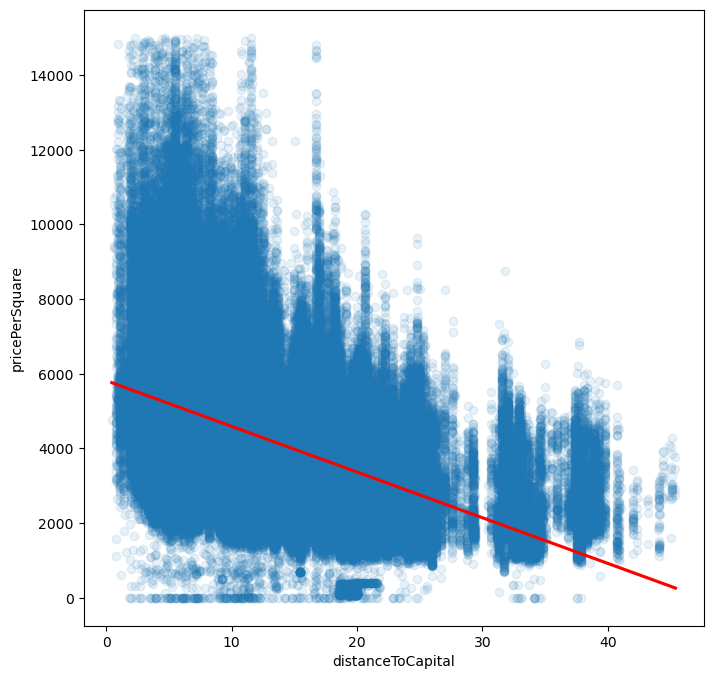

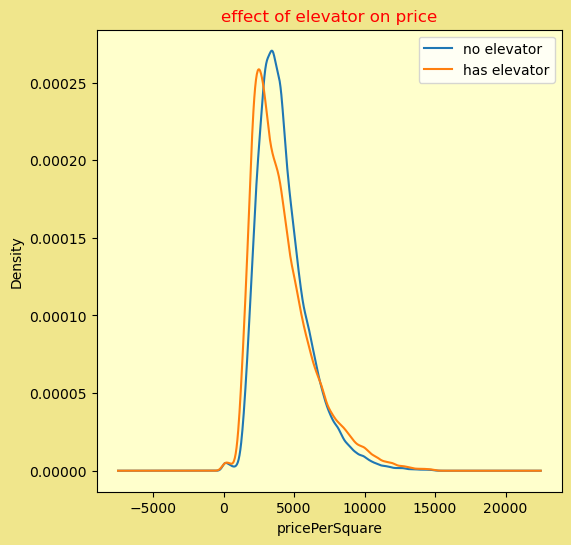

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
housing_no_outlier = pd.read_csv('housing_no_outlier.csv', encoding='gbk')

from math import radians
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

housing_capital = housing_no_outlier.copy()
housing_capital['distanceToCapital'] = 6371.0088*np.arccos(np.sin(np.radians(housing_capital['Lat']))*np.sin(capital_Lat)+
np.cos(np.radians(housing_capital['Lat']))*np.cos(capital_Lat)*np.cos(np.radians(housing_capital['Lng'])-capital_Lng))


housing_capital.head()

housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = housing_PPS['totalPrice']*1000/housing_PPS['square']

housing_PPS.head()

fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

fig, ax = plt.subplots()
fig.set_size_inches(6,6)
x=housing_PPS[housing_PPS['elevator']=='has elevator']
y=housing_PPS[housing_PPS['elevator']=='no elevator']

ax.set_facecolor("#ffffcc")

fig.set_facecolor('khaki')
plt.xlabel('pricePerSquare')
plt.ylabel('Density')
plt.title('effect of elevator on price',color='red')
x['pricePerSquare'].plot.density()
y['pricePerSquare'].plot.density()
ax.legend(['no elevator', 'has elevator'])
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)

Text(0, 0.5, 'frequency')

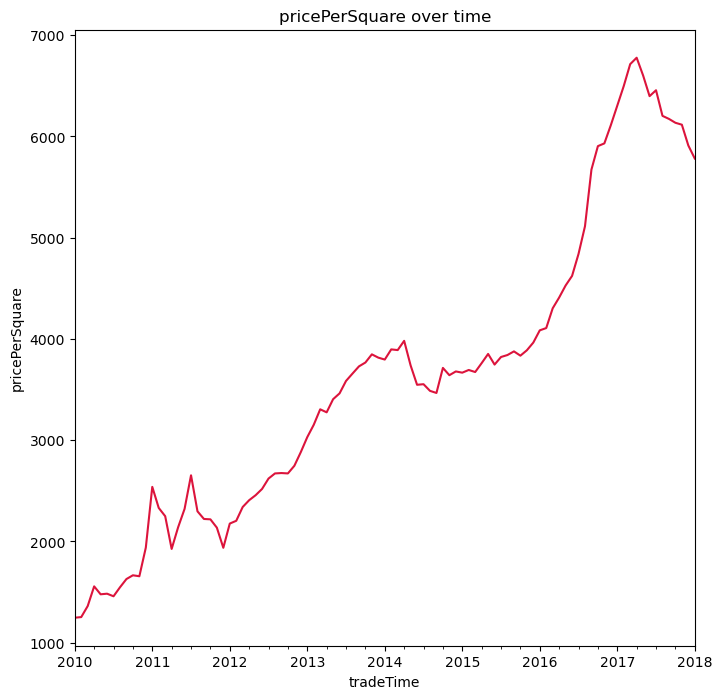

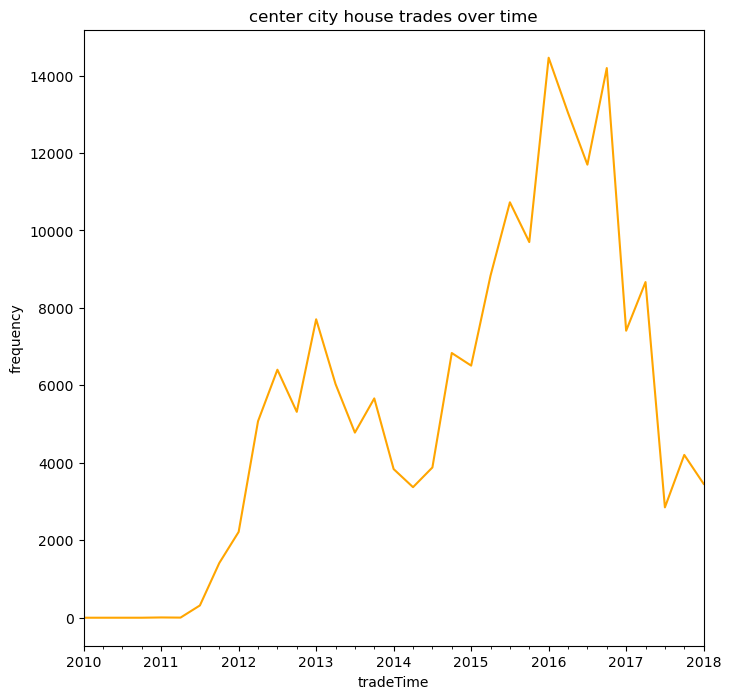

In [16]:
housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')
import numpy as np
districts = housing_extended.district.unique()
districts_df = pd.DataFrame(data=np.sort(districts), columns=['district'])
districts_df
districts_df['pricePerSquare mean'] = housing_extended.groupby(by='district',axis=0)['pricePerSquare'].mean().values
districts_df['% houses with elevator'] = housing_extended.groupby(by='district',axis=0)['elevator'].apply(lambda x: (x[x == 'has elevator'].count()/x.count()) * 100).values
districts_df['% houses with subway'] = housing_extended.groupby(by='district',axis=0)['subway'].apply(lambda x: (x[x == 'has subway'].count()/x.count()) * 100).values
districts_df['square mean'] = housing_extended.groupby(by='district',axis=0)['square'].mean().values
districts_df['buildeng age mean'] = 2021 - housing_extended.groupby(by='district',axis=0)['constructionTime'].mean().values
districts_df['frequent buildingStructure'] = housing_extended.groupby(by='district',axis=0)['buildingStructure'].agg(lambda x : x.value_counts().idxmax()).values
districts_df
districts_df.set_index('district', inplace=True)
districts_df
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])
housing_extended.head()
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(8,8)

housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='M', on='tradeTime')['pricePerSquare'].mean().plot(ax=ax1, color = 'crimson')
ax1.set_title('pricePerSquare over time')
ax1.set_ylabel('pricePerSquare')
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(8,8)

housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='3M', on='tradeTime').distanceToCapital.apply(lambda x: x[x < 15].count()).plot(ax=ax2, color='orange')
ax2.set_title('center city house trades over time')
ax2.set_ylabel('frequency')